# Unsupervised Learning: Clustering analysis

In this notebook, we will explore some clustering techniques using python

### 1. Load Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### 2. Read Data into a Pandas Data Frame 

In [3]:
df = pd.read_csv('https://goz39a.s3.eu-central-1.amazonaws.com/Cluster.csv',index_col='T',parse_dates=True)

### 3. Quick look at the data

In [4]:
df.head()

,S,Spread
T,,
2012-10-01,9.81,0.270914
2012-09-28,9.49,0.290254
2012-09-27,9.74,0.250696
2012-09-26,9.49,0.269219
2012-09-25,9.59,0.253442


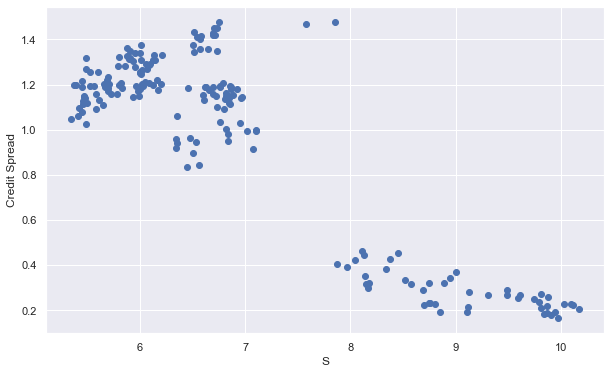

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['S'],df['Spread'])
ax.set_xlabel('S')
ax.set_ylabel('Credit Spread');

# Relationship Creditspread - Share Price

In [6]:
creditspread = df.values[:,-1].reshape(-1,1)
shareprice = df.values[:,0].reshape(-1,1)

In [7]:
# Create X and Y
X = np.log(shareprice[0,0]/shareprice)
y= np.log(creditspread/creditspread[0,0])

## Ordinary Least Squares

In [8]:
# Initialize the Linear model. The fit_intercept paramenter tell the model not to fit the intercept
ols = linear_model.LinearRegression( fit_intercept=False)
# Fit the model to the data
ols.fit(X,y)

LinearRegression(fit_intercept=False)

In [9]:
# Extract the R_Squared score
print("R^2 score: ", ols.score(X,y))

R^2 score:  0.8041995869092445


## Plot the result

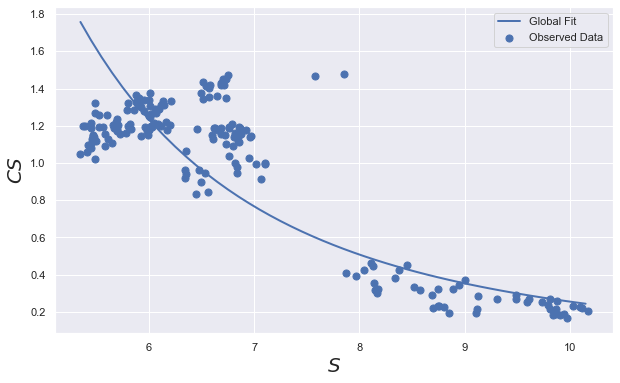

In [10]:
#plotthe results
fig = plt.figure(figsize=[10,6])
plt.scatter(shareprice,creditspread,label='Observed Data',s=50)
S = np.arange(min(shareprice),max(shareprice),.1).reshape(-1,1)
CS = np.exp(ols.predict(np.log(shareprice[0,0]/S)))*creditspread[0,0]
plt.plot(S,CS, label='Global Fit',linewidth=2)
plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)
plt.legend();

## We could have doen a regression for _each_ cluset

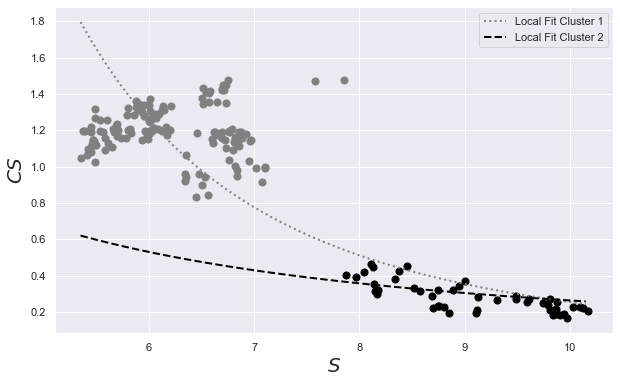

In [10]:
# plotting possible clustors
# choose a value of 7 for S and .81 for CS to divide the data into two clusters
idx = (shareprice>7) &  (creditspread<0.81)

# first fit, Use only the data for the first cluster
X_1 =X[~idx].reshape(-1,1)
Y_1 = y[~idx]
# Fit the linear model to the first cluster
ols_1 = linear_model.LinearRegression( fit_intercept=False)
ols_1.fit(X_1,Y_1)
# save the R^2 score for the first cluster
R_1 = ols_1.score(X_1,Y_1)

# Create a test sample
creditspread_1= np.exp(ols_1.predict(np.log(shareprice[0,0]/S)))*creditspread[0,0]

# Second fit, Use only the data of the second cluster
X_2 =X[idx].reshape(-1,1)
Y_2 = y[idx]
# Fit the model
ols_2 = linear_model.LinearRegression( fit_intercept=False)
ols_2.fit(X_2,Y_2)
# Save the R^2 score and compute a test example
R_2=ols_2.score(X_2,Y_2)
creditspread_2= np.exp(ols_2.predict(np.log(shareprice[0,0]/S)))*creditspread[0,0]

# Plot the results
fig = plt.figure(figsize=[10,6])
# Plot data for cluster 1
plt.scatter(shareprice[~idx],creditspread[~idx],s=50,color='gray')
# Plot data for cluster 2
plt.scatter(shareprice[idx],creditspread[idx],s=50,color='black')
# Plot the Local Fit for both clusters
plt.plot(S,creditspread_1, label='Local Fit Cluster 1',linewidth=2,linestyle='dotted',color='gray')
plt.plot(S,creditspread_2, label='Local Fit Cluster 2',linewidth=2,linestyle='--',color='black')

plt.xlabel('$S$',fontsize=20)
plt.ylabel('$CS$',fontsize=20)
plt.legend();